## Blood Pressure Analysis
*Note: this data is pre-processed in Excel to get `DateTime` column.*

### Read Data

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('root')

import datetime as datetime
date = datetime.datetime.now().date()

%load_ext watermark
%watermark -iv

numpy      1.16.2
matplotlib 3.0.3
pandas     0.24.2



In [2]:
df = pd.read_excel('data/2019-08-01-BP AM & PM_plot.xls',
                  usecols=['DateTime','Sys','Di','Pulse','Activity'])
dfPlot = df.set_index('DateTime')
df.tail()

,DateTime,Sys,Di,Pulse,Activity
37,2019-07-22 20:45:00,130,70,65,8
38,2019-07-24 06:30:00,128,76,92,5
39,2019-07-25 06:54:00,149,85,104,5
40,2019-07-25 21:18:00,143,73,63,5
41,2019-07-26 09:15:00,148,79,55,5


### Plot Data

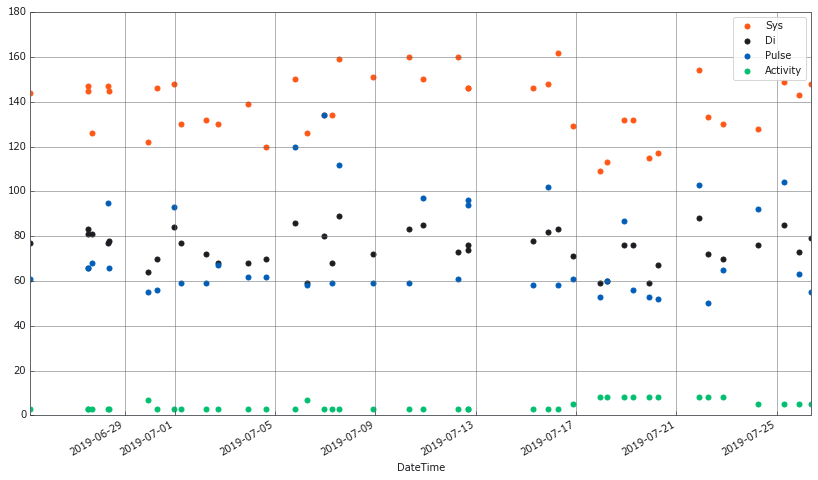

In [3]:
dfPlot.plot(style='.', markersize=10)
plt.gcf().set_size_inches(14,8)

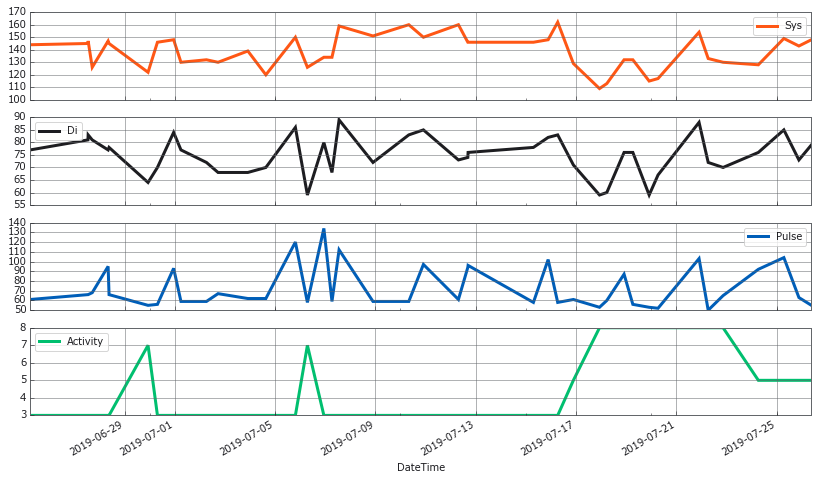

In [4]:
dfPlot.plot(subplots=True, layout=(4,1))
plt.gcf().set_size_inches(14,8)

## Forecast

In [5]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [6]:
# def prophet_forecast(df, x, y, periods):
def prophet_forecast(df: pd.DataFrame,
                     x: str,
                     y: str,
                     periods: int
                    ):
    """
    This function generates a forecast using the Prophet library.
    :param df: a pandas dataframe of the time series data
    :param x: a string of the column name of the x (time) values
    :param y: a string of the column name of the y (forecasted) values
    :param periods: an int of the number of periods to forecast
    :return: display plots of the forecast
    """
    
    # shape data
    dfP = df[[x,y]]
    dfP.columns = ['ds', 'y']
    # print(dfP.tail(1))
    
    # create model
    m1 = Prophet()
    m1.fit(dfP)
    
    # forecast
    future1 = m1.make_future_dataframe(periods=periods)
    forecast1 = m1.predict(future1)
    # print(forecast1.tail(1))
    
    m1.plot_components(forecast1)
    
    m1.plot(forecast1)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.title('Forecast: {}'.format(y))
    plt.xlabel('')
    plt.ylabel(y)
    plt.gca().yaxis.tick_right()

### Forecast: Sys

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


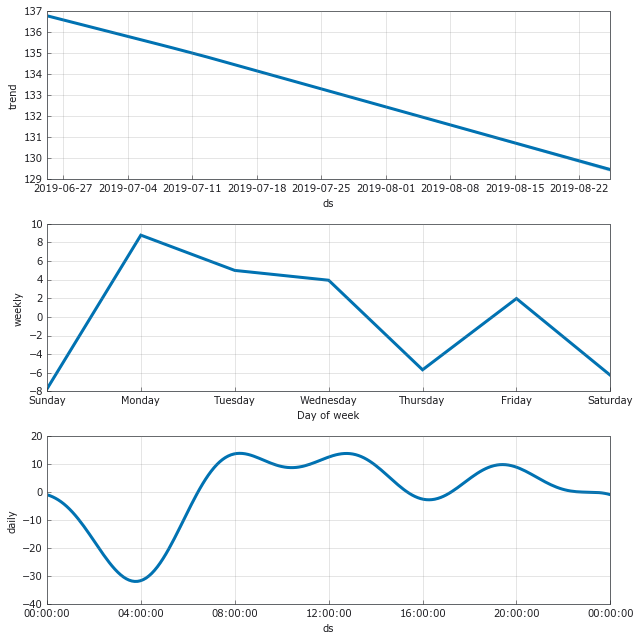

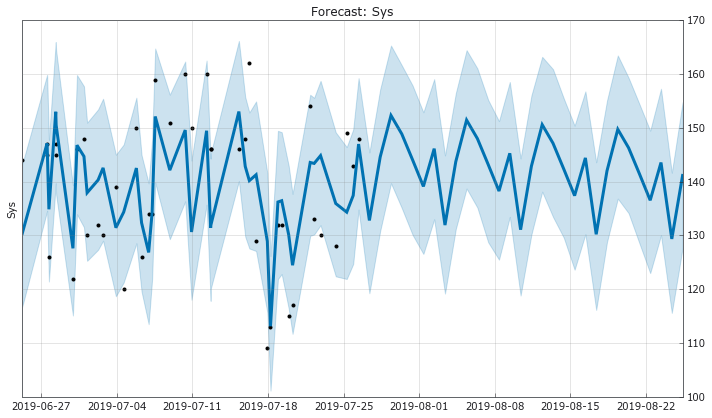

In [7]:
prophet_forecast(df, x='DateTime', y='Sys', periods=30)

### Forecast: Di

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


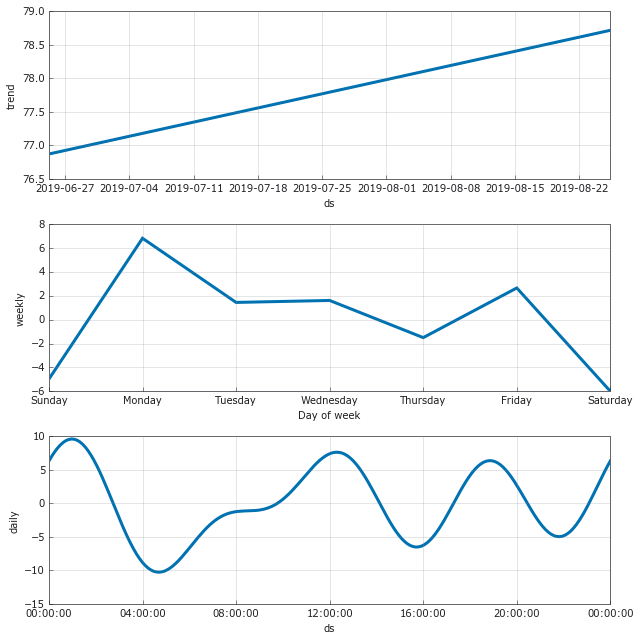

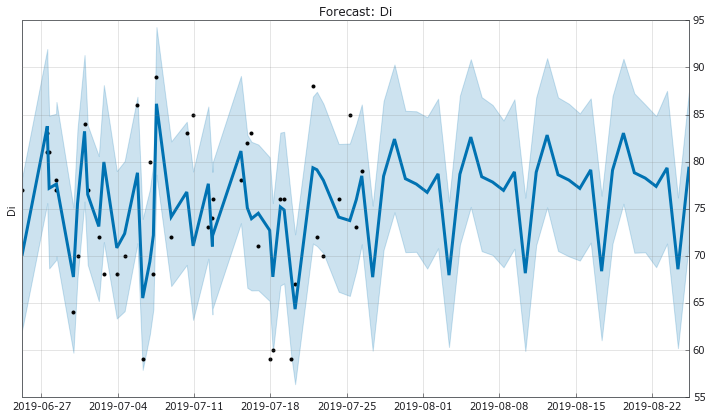

In [8]:
prophet_forecast(df, x='DateTime', y='Di', periods=30)

### Forecast: Pulse

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


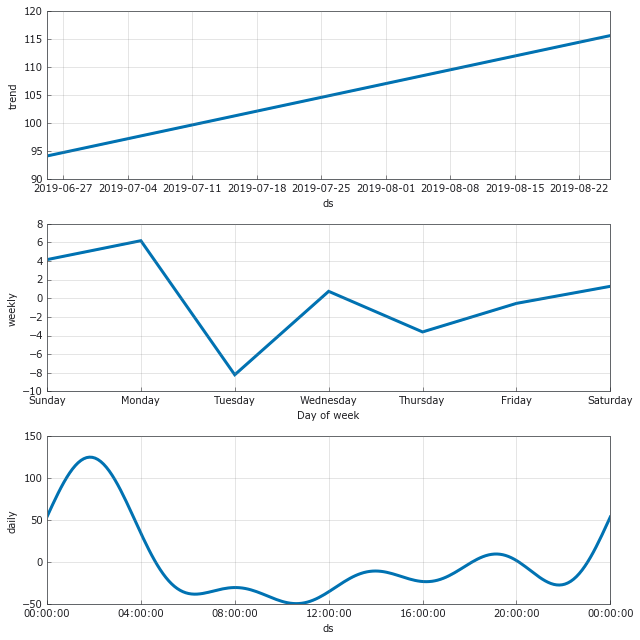

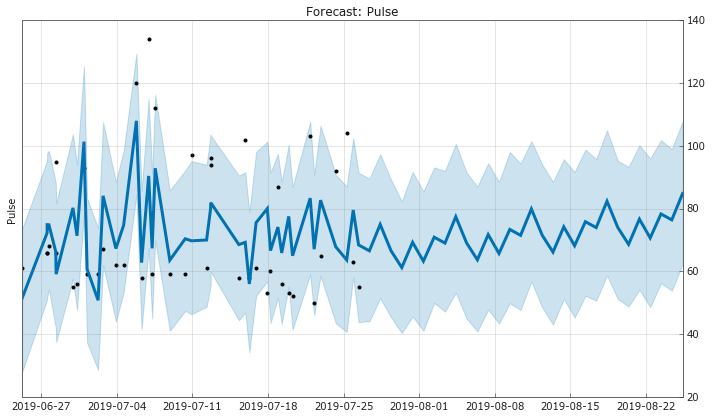

In [9]:
prophet_forecast(df, x='DateTime', y='Pulse', periods=30)